## Import Libraries

In [44]:
import numpy as np #for linear algebra
import pandas as pd #for reading datasets

import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sbn 
sbn.set_theme()

import os #for reading files
import pathlib #for getting extension of files


from sklearn.linear_model import LogisticRegression#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import  GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import QuantileTransformer

## Import Data Files

In [45]:
path=[]
for dirname, _, filenames in os.walk('/Projects'): #'Projects' is the folder name in which the required files are saved
    for filename in filenames:
        if(pathlib.Path(os.path.join(dirname, filename)).suffix =='.csv'):
           path.append(os.path.join(dirname, filename))

# os.path.splitext(filename)[1] gives extension like pathlib

##### Read the imported files

In [46]:
for filename in path:
    if(os.path.basename(filename)=='train.csv'): #filename with extension
        train_set=pd.read_csv(filename) 
    elif(os.path.basename(filename)=='test.csv'): 
        test_set=pd.read_csv(filename)
# os.path.splitext(filename)[0] gives full filepath without extension

## Exploratory Data Analysis(EDA)

##### At first get a brief idea of data i.e features

In [47]:
train_set.head(2)#gives first 2 rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


##### Gather insights of the data now i.e null values

In [48]:
train_set.info()  #gives datatype,count of entries i.e for checking null values in features 
print("\n","="*80,"\n")
test_set.info()
print("\n","="*80,"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

##### 'Age','Cabin','Embarked','Fare' have null values. Find actual % of null values of all features now

In [49]:
#gives % of null values corresponding to all features
print(100*train_set.isnull().sum()/len(train_set))
print("\n","="*80,"\n")
print(100*test_set.isnull().sum()/len(test_set))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


##### Get a better insight of data i.e mean,s.d,percentiles etc.

In [50]:
#gives a vivid insight of data i.e mean,count,max,min,std.50% etc
print(train_set.describe())
print("\n","="*80,"\n")
print(test_set.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


       PassengerId      Pclass         Age       SibSp       Parch        Fare


## Inferences of EDA

<b> Null values:- </b><br>
1.Train set: 19.86% of 'Age', 77.10% of 'Cabin', 0.22% of 'Embarked' <br>
2.Test set:  20.57% of 'Age', 78.22% of 'Cabin', 0.23% of 'Fare' 


<b> Train set description:- </b><br>
1)38.38% of passengers survived<br> 
2)min. age is almost 5 months,max. age is 80 years,avg. age is 29 years<br>
3)75% of passengers are below 38 years old<br> 
4)The range of 'Fare' is high i.e max-min<br> 
5)'Age' is clustered around its mean but 'Fare' is positively skewed

<b>Data Segregation</b><br>
1)Numerical features:- 'Fare','Age'<br>
2)Categorical features:-'Survived','Pclass',"Sex','SibSp','Parch','Embarked'<br>
3)Target feature:-'Survived'
4)Identifiers:-'PassengerId','Ticket','Cabin'


## Data Visualisation

##### Segregation of Numerical and Categorical features based on EDA inference

In [51]:
# categorical features
categorical_features = ['SibSp', 'Sex', 'Embarked', 'Parch', 'Pclass','Survived']

# numeric features
numeric_features = ['Age', 'Fare']

##### Plot distributions of numerical features

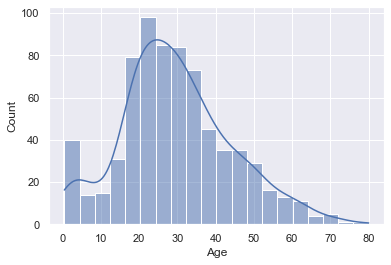

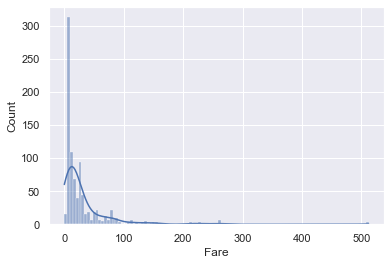

In [52]:
for var in numeric_features: #Age,Fare are numerical as shown in EDA
    sbn.histplot(data=train_set, x=var, kde=True)
    plt.show()

##### Conclusion from plot:- 'Age' is normalised but 'Fare' is positively skewed

##### Plot distributions of categorical features

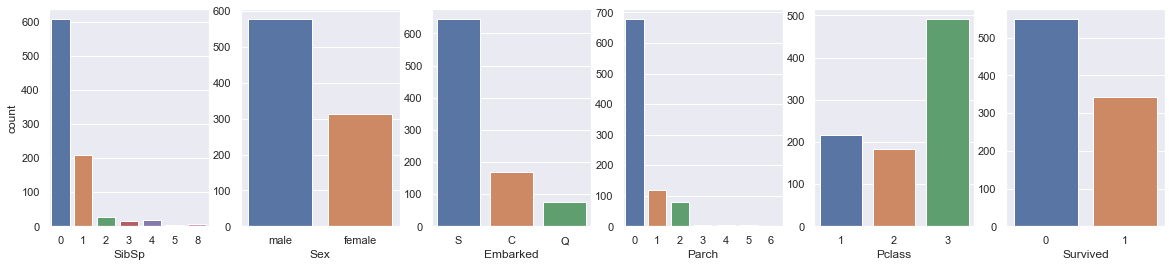

In [53]:
plot, ax = plt.subplots(1 , 6,figsize=(20,4)) #countplot to understand imbalance of data
i=0
for feature in categorical_features:
    sbn.countplot(x=train_set[feature],ax=ax[i])
    i+=1


for i in range(1,6):
  ax[i].set_ylabel('')
  i+=1  
plt.show()

##### Conclusion from plot:- <br>
1)'Survived' is balanced so can use KNN model<br>
2)'Parch','Embarked' is imbalanced

## Feature Selection

##### Find each feature's relation with target feature 'Survived'

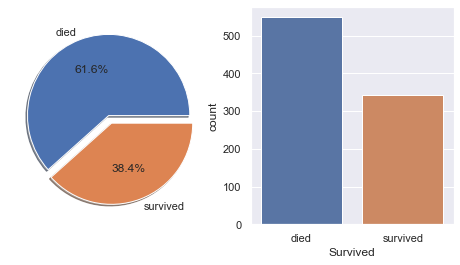

In [54]:
f,ax=plt.subplots(1,2,figsize=(8,4)) #to find if target feature is imbalanced
train_set['Survived'].replace({0:"died",1:"survived"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sbn.countplot(x = train_set["Survived"].replace({0:"died",1:"survived"}) , ax = ax[1])
plt.show()

##### Bar Plot Categorical Features

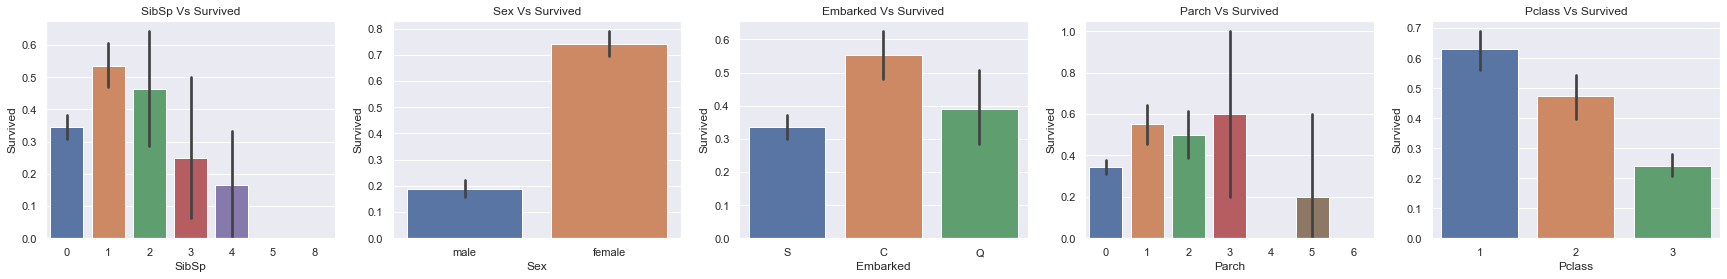

In [55]:
plot,ax = plt.subplots(1 , 5 , figsize=(30,4))
i=0
for feature in categorical_features:
    if(feature != 'Survived'):
      sbn.barplot(data = train_set , x = feature , y = "Survived",ax = ax[i]).set_title(f"{feature} Vs Survived")
    i+=1 
plt.show() 

##### Histogram Plot Numerical Features

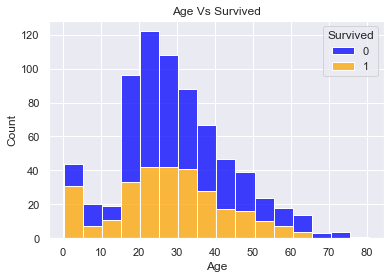

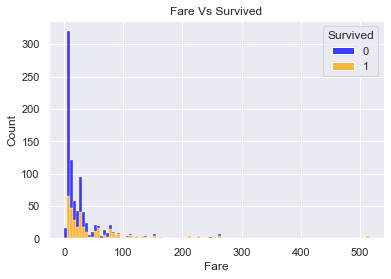

In [56]:

def survived_hist_plot(feature): #to find correlation age and survived
    sbn.histplot(data = train_set , x = feature , hue = "Survived",
             binwidth=5,palette = sbn.color_palette(["blue" , "orange"]) ,multiple = "stack" ).set_title(feature+" Vs Survived")
    plt.show()

for feature in numeric_features:
    survived_hist_plot(feature)

## Correlation Analysis

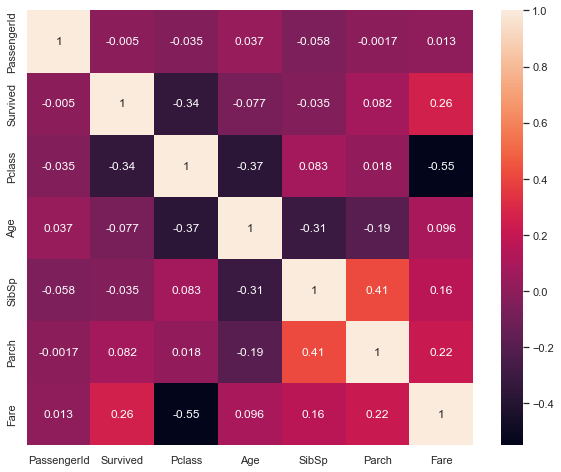

In [57]:
plt.figure(figsize=(10,8))
sbn.heatmap(train_set.corr(),annot=True)
plt.show()

##### Based on Data Visualisation,EDA and Correlation Analysis:-<br>
1) 'PassengerId','Cabin','Ticket' are just identifiers<br>
2) Pclass and Fare, Pclass and Age are highly correlated - it is possible we can just use one of them for our model 

##### Survival for each Pclass against age

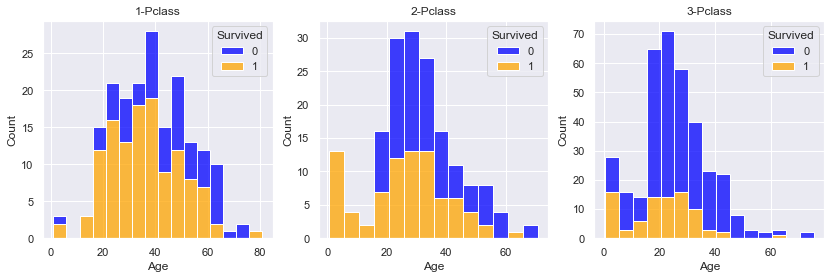

In [58]:
plot , ax = plt.subplots(1 , 3 , figsize=(14,4))

for i in range(3):
    sbn.histplot(data = train_set.loc[train_set["Pclass"]==(i+1)] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[i],
    palette = sbn.color_palette(["blue" , "orange"]),multiple = "stack").set_title(str(i+1)+"-Pclass")
    
plt.show() 


##### Survival for each Sex against age

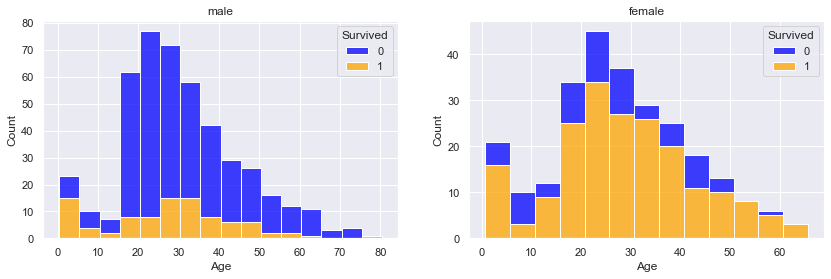

In [59]:
plot , ax = plt.subplots(1 , 2 , figsize=(14,4))
arr = ["male","female"]

for i in range(2):
    sbn.histplot(data = train_set.loc[train_set["Sex"]==arr[i]] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[i],
    palette = sbn.color_palette(["blue" , "orange"]),multiple = "stack").set_title(arr[i])

plt.show()

## Data Imputation

##### Drop insignificant features like 'PassengerId','Ticket','Cabin'

In [60]:
#drop all features that are just identifiers
train_set_mod=train_set.copy().drop(columns=["PassengerId","Ticket","Cabin"])
test_set_mod=test_set.copy().drop(columns=["PassengerId","Ticket","Cabin"])

##### Impute Null Values for Train and Test data

<b>Imputation of 'Embark'<b>

In [61]:
embark_mode=train_set_mod.Embarked.dropna().max() # impute with most common 'Embark' among the passengers in train set
train_set_mod.Embarked.fillna(embark_mode, inplace=True)


test_set_mod['Embarked'] = test_set_mod['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int) #drop null entries in test set

<b>Imputation of 'Fare'<b>


In [62]:
test_set_mod.Fare.fillna(test_set_mod.Fare.dropna().median() , inplace= True)# impute with most common Fare paid

<b>Imputation of 'Age'<b>

In [63]:
train_set_mod['Prefix'] = train_set_mod['Name'].str.split(expand=True)[1] #to check if all ages are correctly categorised into children,adult,elder
test_set_mod['Prefix'] = test_set_mod['Name'].str.split(expand=True)[1]
prefix_train=train_set_mod['Prefix'].value_counts()
prefix_test=test_set_mod['Prefix'].value_counts()

train_set_mod['Prefix'] = train_set_mod.Prefix.apply(lambda x: x if x in prefix_train[prefix_train>10] else 'other')
test_set_mod['Prefix'] = test_set_mod.Prefix.apply(lambda x: x if x in prefix_test[prefix_test>10] else 'other')

def impute_mean(series):
    return series.fillna(series.mean())

by_sex_class = train_set_mod.groupby(['Prefix','Sex', 'Pclass']) #take the mean age of passengers with the same prefix in the same Pclass and Sex
train_set_mod.Age = by_sex_class['Age'].transform(impute_mean)
print(by_sex_class['Age'].mean())

by_sex_class = test_set_mod.groupby(['Prefix','Sex', 'Pclass'])
test_set_mod.Age = by_sex_class['Age'].transform(impute_mean)
print(by_sex_class['Age'].mean())


Prefix   Sex     Pclass
Master.  male    1          5.306667
                 2          2.258889
                 3          5.350833
Miss.    female  1         30.000000
                 2         22.241935
                 3         16.186567
Mr.      male    1         41.629412
                 2         32.814815
                 3         28.646119
Mrs.     female  1         41.606061
                 2         33.682927
                 3         33.633333
other    female  1         31.285714
                 2         27.500000
                 3         25.000000
         male    1         47.307692
                 2         40.555556
                 3         30.450000
Name: Age, dtype: float64
Prefix   Sex     Pclass
Master.  male    1          9.500000
                 2          5.000000
                 3          7.117500
Miss.    female  1         31.428571
                 2         16.528000
                 3         19.872647
Mr.      male    1         41.488636
 

##### Check if imputation is done

In [64]:
print(train_set_mod.isnull().sum()==0)
print("\n","_"*50,"\n")
print(test_set_mod.isnull().sum()==0)

Survived    True
Pclass      True
Name        True
Sex         True
Age         True
SibSp       True
Parch       True
Fare        True
Embarked    True
Prefix      True
dtype: bool

 __________________________________________________ 

Pclass      True
Name        True
Sex         True
Age         True
SibSp       True
Parch       True
Fare        True
Embarked    True
Prefix      True
dtype: bool


## Data Binning(Handling Outliers)

##### Checking outliers using boxplot

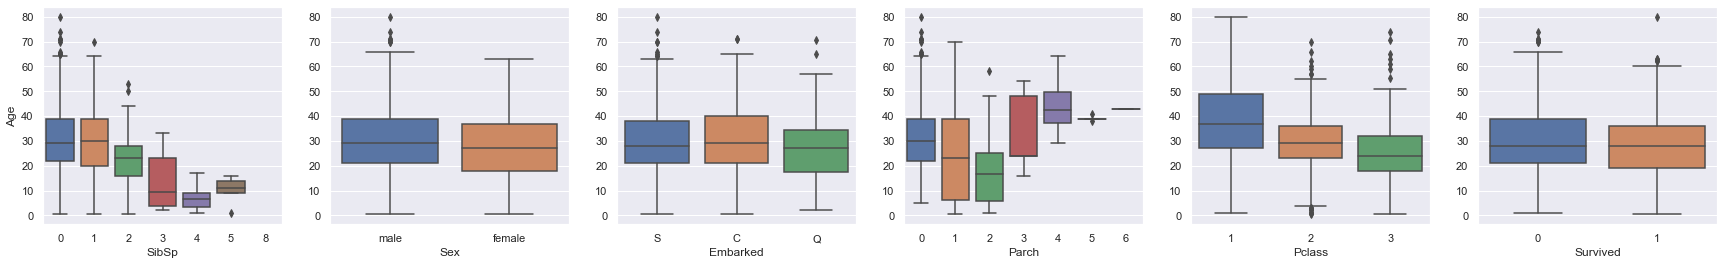

In [65]:
# there are a lot of null values in 'Age' feature
# let's check how this feature correlated with others
i=0
plot , ax = plt.subplots(1 , 6 , figsize=(30,4))
for feature in categorical_features:
    sbn.boxplot(data = train_set, x = feature, y = 'Age', orient = 'v',ax=ax[i])#can be done by log(Age+1) for normalising
    i+=1

for i in range(1,6):
  ax[i].set_ylabel('')
  i+=1 
plt.show() 
    

##### Transforming categorical variable 'Sex' into numeric

In [66]:
# convert to numerical as machine learning models require categorical variables to be numerical
train_set_mod['Sex'] = train_set_mod['Sex'].map( {'female': 1, 'male': 0} ).astype(int)    
test_set_mod['Sex'] = test_set_mod['Sex'].map( {'female': 1, 'male': 0} ).astype(int)   

##### Convert Categorical variable 'Embarked' in Numeric

In [67]:
train_set_mod['Embarked'] = train_set_mod['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

##### Handling Outliers in 'Age'

In [68]:
# age distribution is slightly skewed
# equal width binning should be sufficient as we do not expect huge no. of outliers

train_set_mod['Age_binned']=pd.cut(train_set_mod['Age'],bins=range(0,80+5,16),labels = range(1,len(range(0,80+5,16))))
train_set_mod[['Age_binned', 'Survived']].groupby(['Age_binned'], as_index=False).mean().sort_values(by='Age_binned', ascending=True)

test_set_mod['Age_binned']=pd.cut(train_set_mod['Age'],bins=range(0,80+5,16),labels = range(1,len(range(0,80+5,16))))

# convert to numeric
train_set_mod['Age_binned']=train_set_mod["Age_binned"].cat.codes
test_set_mod['Age_binned']=test_set_mod["Age_binned"].cat.codes

##### Handling Outliers in 'Fare'

In [69]:
# as fare distribution is highly skewed, quantile based binning will be more suitable

train_set_mod['Fare_binned']=pd.qcut(train_set_mod['Fare'],q=4,labels = range(1,4+1))
train_set_mod[['Fare_binned', 'Survived']].groupby(['Fare_binned'], as_index=False).mean().sort_values(by='Fare_binned', ascending=True)

test_set_mod['Fare_binned']=pd.qcut(train_set_mod['Fare'],q=4,labels = range(1,4+1))

# convert to numeric
train_set_mod['Fare_binned']=train_set_mod["Fare_binned"].cat.codes
test_set_mod['Fare_binned']=test_set_mod["Fare_binned"].cat.codes

##### Drop 'Age','Fare'after discretization of data

In [70]:
# drop those variables that we no longer need after we have binned them
train_set_mod.drop(["Prefix","Age","Fare"],axis=1,inplace=True)
test_set_mod.drop(["Prefix","Age","Fare"],axis=1,inplace=True)

## Feature Engineering

##### Bin where survival chances look different for family size based on Parch and Sibsp. 

In [71]:
train_set_mod['FamilySize']=train_set_mod['Parch']+train_set_mod['SibSp']+1 #table for survival chances against family size
train_set_mod[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [72]:

test_set_mod['FamilySize']=test_set_mod['Parch']+test_set_mod['SibSp']+1#similary for test set as above


train_set_mod.drop(['Parch',"SibSp","Name"],axis=1,inplace=True)#drop columns after binning
test_set_mod.drop(['Parch',"SibSp","Name"],axis=1,inplace=True)



##### Check modified dataset before using it for model selection

In [73]:
train_set_mod.head()


,Survived,Pclass,Sex,Embarked,Age_binned,Fare_binned,FamilySize
0,0,3,0,0,1,0,2
1,1,1,1,1,2,3,2
2,1,3,1,0,1,1,1
3,1,1,1,0,2,3,2
4,0,3,0,0,2,1,1


## Model

In [74]:
Y_train=train_set_mod.copy()["Survived"]
X_train=train_set_mod.copy().drop(columns=["Survived"])
test=test_set_mod.copy()
print(f"X_train shape is = {X_train.shape}" )
print(f"Y_train shape is = {Y_train.shape}" )
print(f"Test shape is = {test.shape}" )

X_train shape is = (891, 6)
Y_train shape is = (891,)
Test shape is = (418, 6)


In [75]:
# Cross validate model with Kfold stratified cross val to maintain the same class ratio
kfold = StratifiedKFold(n_splits=10)

# Test different algorithms
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(GaussianNB())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","RandomForest","KNeighboors","LogisticRegression","GaussianNB"]})
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.821548,0.026325,SVC
1,0.805855,0.044580,DecisionTree
2,0.808140,0.040908,RandomForest
3,0.792447,0.035346,KNeighboors
4,0.792372,0.023117,LogisticRegression
5,0.774457,0.038084,GaussianNB


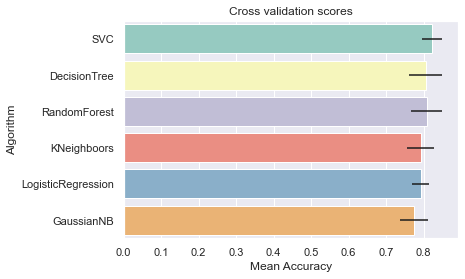

In [76]:
g = sbn.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g.set_title("Cross validation scores")
plt.show()

##### Conclusion-CV error between best and worst model

## Hyperparameter Tuning

##### Support Vector Machine

In [77]:

param_grid  = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'nu': np.arange(0.3, 0.8, 0.2), 
              'degree': [2, 3, 5], 
              'gamma' : ['scale', 'auto']}

gsSVC = GridSearchCV(svm.NuSVC(random_state = 42), param_grid)
gsSVC.fit(X_train, Y_train)
gsSVC.best_score_, gsSVC.best_params_

print("Best params:",gsSVC.best_params_,sep='\t',end='\n\n')
print("Best score in grid search:",round(gsSVC.best_score_,3),sep='\t')
print("Score on whole trained data:",round(gsSVC.score(X_train, Y_train),3),sep='\t')


Best params:	{'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.5}

Best score in grid search:	0.823
Score on whole trained data:	0.826


##### Random Forest

In [78]:
random_forest = RandomForestClassifier(n_estimators=100)
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,4,5],
    'max_features': [2, 3,5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    "n_estimators": [1, 5, 10]
}

gsRF = GridSearchCV(random_forest, param_grid, cv=kfold, verbose=1)
gsRF.fit(X_train, Y_train)

print("Best params:",gsRF.best_params_,sep='\t',end='\n\n')
print("Best score in grid search:",round(gsRF.best_score_,3),sep='\t')
print("Score on whole trained data:",round(gsRF.score(X_train, Y_train),3),sep='\t')

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best params:	{'bootstrap': True, 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 5}

Best score in grid search:	0.827
Score on whole trained data:	0.835


##### Logistic Regression

In [79]:
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
#used after splitting data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# param_grid = {'penalty':['l1','l2','elasticnet'],'C':np.logspace(0, 4, 10),'l1_ratio':np.linspace(0,1,20)}
# param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
param_grid={'solver':['newton-cg','lbfgs','liblinear'],'C':[0.001,0.01,0.1,1,10]}

# gsLR = LogisticRegression(random_state=42)
gsLR = GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=10)
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_Y_train = scaler.fit_transform(Y_train)

gsLR.fit(X_train, Y_train)
gsLR.score(X_train, Y_train)
print("Best params:",gsRF.best_params_,sep='\t',end='\n\n')
print("Best score in grid search:",round(gsRF.best_score_,3),sep='\t')
print("Score on whole trained data:",round(gsRF.score(X_train, Y_train),3),sep='\t')

#for checking parameter list
# estimator.get_params().keys()

Best params:	{'bootstrap': True, 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 5}

Best score in grid search:	0.827
Score on whole trained data:	0.835


##### K-Nearest Neighbour

In [80]:
gsKNN = KNeighborsClassifier()
# gsKNN = KNeighborsClassifier(n_neighbors=19)

operations = [('scaler',scaler),('knn',gsKNN)]


pipe = Pipeline(operations)
k_values = list(range(1,30))
param_grid = {'knn__n_neighbors': k_values}
grid_knn_model = GridSearchCV(pipe, param_grid=param_grid,cv=5,scoring='accuracy')


gsKNN.fit(X_train,Y_train)
gsKNN.score(X_train, Y_train)
print("Best params:",gsRF.best_params_,sep='\t',end='\n\n')
print("Best score in grid search:",round(gsRF.best_score_,3),sep='\t')
print("Score on whole trained data:",round(gsRF.score(X_train, Y_train),3),sep='\t')

Best params:	{'bootstrap': True, 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 5}

Best score in grid search:	0.827
Score on whole trained data:	0.835


##### Gaussian Naive Bayes

In [81]:
gsGNB = GaussianNB()
gsGNB.fit(X_train, Y_train)
gsGNB.score(X_train, Y_train)
print("Score on whole trained data:",round(gsGNB.score(X_train, Y_train),3),sep='\t')

Score on whole trained data:	0.772


### Evaluate model performance

In [82]:
# We just use the model with the best score in grid search.
models = pd.DataFrame({
    'Model': ["SVC","RandomForest","LogisticRegression","KNeighboors","GaussianNaiveBayes"],
     'Score':[round(gsSVC.score(X_train, Y_train) * 100, 2),
              round(gsRF.score(X_train, Y_train) * 100, 2),
              round(gsKNN.score(X_train, Y_train) * 100, 2),
              round(gsLR.score(X_train, Y_train) * 100, 2),
              round(gsGNB.score(X_train, Y_train) * 100, 2)
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,LogisticRegression,84.62
1,RandomForest,83.50
0,SVC,82.60
3,KNeighboors,79.91
4,GaussianNaiveBayes,77.22


## Submission

In [83]:
Y_pred = gsRF.predict(test)
submission = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)